In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 100
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import math
import statistics
from statsmodels.tsa.api import Holt

In [2]:
df1 = pd.read_csv('109.csv')
id = range(366)
df1['id'] = id
print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())
df2 = pd.read_csv('110.csv')
id = range(366, 731)
df2['id'] = id
df2.set_index('id')
print('Head of dataset:')
display(df2.head())
print("Tail of dataset:")
display(df2.tail())

Head of dataset:


,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺,id
0,1月1日,167.10,308.766,2.1,"2,416,420","462,420","1,954,000","2,206,080","2,668,500",0
1,1月2日,167.27,310.273,0.0,"1,718,880","740,880","978,000","1,889,280","2,630,160",1
2,1月3日,167.35,310.918,0.0,"1,391,012","1,302,012","89,000","1,715,400","3,017,412",2
3,1月4日,167.34,310.844,0.1,"1,002,260","1,180,260","-178,000","1,586,160","2,766,420",3
4,1月5日,167.31,310.625,0.2,"1,018,292","1,463,292","-445,000","1,481,040","2,944,332",4


Tail of dataset:


,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺,id
361,12月27日,168.44,320.737,1.1,"2,568,852","2,118,852","450,000","3,963,600","6,082,452",361
362,12月28日,168.46,320.868,2.2,"1,949,832","2,129,832","-180,000","3,466,800","5,596,632",362
363,12月29日,168.32,319.622,0.4,"1,730,160","3,260,160","-1,530,000","3,146,400","6,406,560",363
364,12月30日,168.16,318.161,10.6,"1,869,816","3,216,816","-1,347,000","2,921,040","6,137,856",364
365,12月31日,168.11,317.802,0.0,"988,000",0,"988,000","2,761,200","2,761,200",365


Head of dataset:


,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺,id
0,1月1日,168.20,318.524,0.0,"1,109,556","1,289,556","-180,000","2,475,360","3,764,916",366
1,1月2日,168.18,318.419,3.8,"974,520","614,520","360,000","2,221,200","2,835,720",367
2,1月3日,168.22,318.741,0.4,"817,460","458,460","359,000","2,328,120","2,786,580",368
3,1月4日,168.23,318.887,16.1,"1,168,992","1,168,992",0,"2,098,080","3,267,072",369
4,1月5日,168.30,319.450,20.7,"2,306,772","2,126,772","180,000","2,324,880","4,451,652",370


Tail of dataset:


,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺,id
360,12月27日,168.07,317.416,13.6,"4,729,660","4,101,660","628,000","2,787,480","6,889,140",726
361,12月28日,168.15,318.109,1.1,"3,473,152","2,575,152","898,000","2,765,520","5,340,672",727
362,12月29日,168.22,318.749,0.4,"2,310,048","2,130,048","180,000","2,468,160","4,598,208",728
363,12月30日,168.20,318.502,0.2,"1,857,808","2,396,808","-539,000","2,243,520","4,640,328",729
364,12月31日,168.16,318.232,1.4,"1,244,456","615,456","629,000","2,050,560","2,666,016",730


In [3]:
df3 = df1.append(df2)
df3.set_index('id', inplace = True)
for i in df3.index:
    df3['水庫進流量/立方公尺'][i] = int(df3['水庫進流量/立方公尺'][i].replace(",",""))
print('Head of dataset:')
display(df3.head())
print("Tail of dataset:")
display(df3.tail())

C:\Users\ASUS\AppData\Local\Temp/ipykernel_24092/353338230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['水庫進流量/立方公尺'][i] = int(df3['水庫進流量/立方公尺'][i].replace(",",""))


Head of dataset:


,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺
id,,,,,,,,,
0,1月1日,167.10,308.766,2.1,2416420,"462,420","1,954,000","2,206,080","2,668,500"
1,1月2日,167.27,310.273,0.0,1718880,"740,880","978,000","1,889,280","2,630,160"
2,1月3日,167.35,310.918,0.0,1391012,"1,302,012","89,000","1,715,400","3,017,412"
3,1月4日,167.34,310.844,0.1,1002260,"1,180,260","-178,000","1,586,160","2,766,420"
4,1月5日,167.31,310.625,0.2,1018292,"1,463,292","-445,000","1,481,040","2,944,332"


Tail of dataset:


,日期,翡翠水庫日平均水位/公尺,水庫有效蓄水量/百萬立方公尺,集水區平均雨量/毫米,水庫進流量/立方公尺,水庫放流量/立方公尺,進流量減放流量/立方公尺,南勢溪流量/立方公尺,南北勢溪合計原水量/立方公尺
id,,,,,,,,,
726,12月27日,168.07,317.416,13.6,4729660,"4,101,660","628,000","2,787,480","6,889,140"
727,12月28日,168.15,318.109,1.1,3473152,"2,575,152","898,000","2,765,520","5,340,672"
728,12月29日,168.22,318.749,0.4,2310048,"2,130,048","180,000","2,468,160","4,598,208"
729,12月30日,168.20,318.502,0.2,1857808,"2,396,808","-539,000","2,243,520","4,640,328"
730,12月31日,168.16,318.232,1.4,1244456,"615,456","629,000","2,050,560","2,666,016"


In [4]:
def MAF(y_v, p):
    ma_p_a = np.zeros(len(y_v) + 1)
    ma_p_a[:] = np.nan
    mvlen = p
    for i in range(mvlen, len(y_v) + 1):
        ma_p_a[i] = np.mean(y_v[i-mvlen: i])
    t1 = range(0, len(y_v) + 1) + np.ones((len(y_v) + 1))
    org_data = np.append(y_v, [np.nan])
    ma_df_p = pd.DataFrame({'time':t1, 'orig': org_data, 'ma_forecast': ma_p_a})
    return {"ma_forecast":ma_df_p}


In [5]:
#temp = []
#for i in range(731):
#    temp.append(int(df3['水庫進流量/立方公尺'][i]))
#df = pd.DataFrame(temp, columns = '水庫進流量/立方公尺')
#display(df.head())
print(type(df3['水庫進流量/立方公尺'][0]))

<class 'int'>


,time,orig,ma_forecast
0,1.0,2416420,NaN
1,2.0,1718880,NaN
2,3.0,1391012,NaN
3,4.0,1002260,1.842104e+06
4,5.0,1018292,1.370717e+06
...,...,...,...
727,728.0,3473152,3.821808e+06
728,729.0,2310048,4.371589e+06
729,730.0,1857808,3.504287e+06
730,731.0,1244456,2.547003e+06


c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 36914 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 27700 missing from current

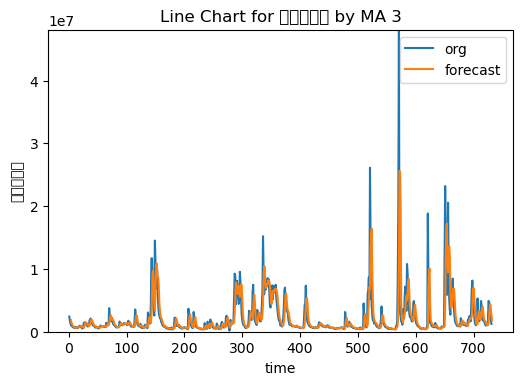

In [6]:
ma03_result = MAF(df3['水庫進流量/立方公尺'], 3)
ma03_result_df = []
ma03_result_df = pd.DataFrame(ma03_result['ma_forecast'])
display(ma03_result_df)

plt.plot(ma03_result_df['time'], ma03_result_df['orig'])
plt.plot(ma03_result_df['time'], ma03_result_df['ma_forecast'])
plt.ylim(0, max(df3['水庫進流量/立方公尺'])+100)
plt.legend(labels=['org', 'forecast'])
plt.xlabel('time')
plt.ylabel('水庫進流量')
plt.title('Line Chart for 水庫進流量 by MA 3')
plt.show()

In [7]:
def ExSm(y_v, a):
    es_df = pd.DataFrame({'orig': y_v})
    es_df['es_res'] = es_df['orig'].ewm(alpha = a, adjust= False).mean()
    es_al_a = np.zeros(len(y_v) + 1)
    es_al_a[0] = es_df['es_res'][0]
    es_al_a[1] = es_df['es_res'][0]
    for i in range(2, len(y_v) + 1):
        es_al_a[i] = es_df['es_res'][i-1]
    t1 = range(0, len(y_v) + 1) + np.ones((len(y_v) + 1))
    org_data = y_v.tolist()
    es_df_e = pd.DataFrame({'time':t1, 'orig': np.array(org_data + [float('nan')]), 'es_forecast': es_al_a})
    return {"es_forecast":es_df_e}

,time,orig,es_forecast
0,1.0,2416420.0,2.416420e+06
1,2.0,1718880.0,2.416420e+06
2,3.0,1391012.0,1.858388e+06
3,4.0,1002260.0,1.484487e+06
4,5.0,1018292.0,1.098705e+06
...,...,...,...
727,728.0,3473152.0,4.636274e+06
728,729.0,2310048.0,3.705776e+06
729,730.0,1857808.0,2.589194e+06
730,731.0,1244456.0,2.004085e+06


c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 36914 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 27700 missing from current

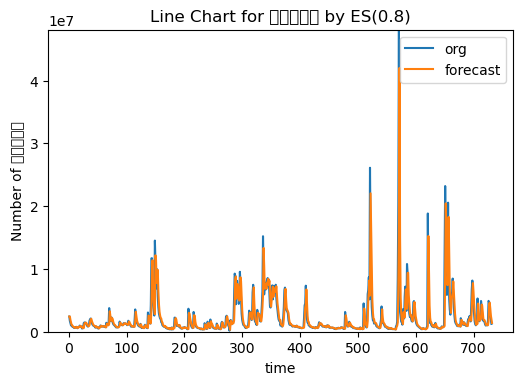

In [8]:
es02_result = ExSm(df3['水庫進流量/立方公尺'], 0.8)
es02_result_df = []
es02_result_df = pd.DataFrame(es02_result['es_forecast'])
display(es02_result_df)
plt.plot(es02_result_df['time'], es02_result_df['orig'])
plt.plot(es02_result_df['time'], es02_result_df['es_forecast'])
plt.ylim(0, max(df3['水庫進流量/立方公尺'])+100)
plt.legend(labels=['org', 'forecast'])
plt.xlabel('time')
plt.ylabel('Number of 水庫進流量')
plt.title('Line Chart for 水庫進流量 by ES(0.8)')
plt.show()

In [9]:
def ESM(y_v, a, b, f0, t0, p):
    esm_a = np.array(y_v)
    esm_model = Holt(esm_a, initialization_method='known', initial_level = f0, initial_trend = t0).fit(smoothing_level=a, smoothing_trend=b, optimized=False)
    esm_fit = esm_model.fittedvalues
    esm_fcast = esm_model.forecast(p)
    esm_ab_a = np.zeros(len(y_v) + p + 1)
    esm_ab_a[0] = f0 + t0
    for i in range(1, len(y_v) + 1):
        esm_ab_a[i] = esm_fit[i-1]
    for i in range(len(y_v) + 1, len(y_v) + p + 1):
        esm_ab_a[i] = esm_fcast[i-len(y_v)-1]
    t1 = range(0, len(y_v) + p + 1)
    Ini_v = f0 + t0
    W_ini_v = np.append(Ini_v, y_v)
    org_data = np.append(W_ini_v, [np.nan]*p)
    wsm_df_ab = pd.DataFrame({'time':t1, 'orig': org_data, 'esm_forecast': esm_ab_a})
    return {"esm_forecast":wsm_df_ab}

,time,orig,esm_forecast
0,0,2416421,2.416421e+06
1,1,2416420,2.416421e+06
2,2,1718880,2.416421e+06
3,3,1391012,1.746782e+06
4,4,1002260,1.293637e+06
...,...,...,...
729,729,2310048,4.085927e+06
730,730,1857808,2.630973e+06
731,731,1244456,1.854484e+06
732,732,NaN,1.110900e+06


c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 36914 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 27700 missing from current

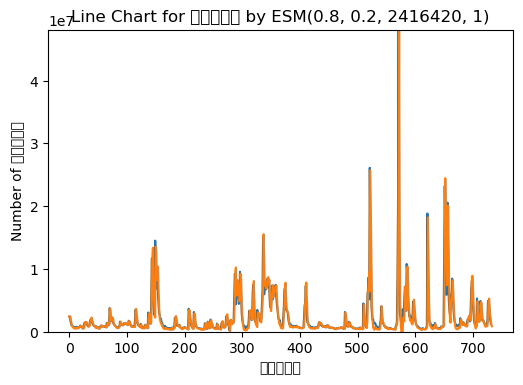

In [10]:
esm_ab_result = ESM(df3['水庫進流量/立方公尺'], 0.8, 0.2, 2416420, 1, 2)
esm_ab_result_df = []
esm_ab_result_df = pd.DataFrame(esm_ab_result['esm_forecast'])
display(esm_ab_result_df)
plt.plot(esm_ab_result_df['time'], esm_ab_result_df['orig'])
plt.plot(esm_ab_result_df['time'], esm_ab_result_df['esm_forecast'])
plt.ylim(0, max(df3['水庫進流量/立方公尺'])+100)
plt.xlabel('水庫進流量')
plt.ylabel('Number of 水庫進流量')
plt.title('Line Chart for 水庫進流量 by ESM(0.8, 0.2, 2416420, 1)')
plt.show()


In [11]:
def ErrMetrix(y_v, f_v):
    y_v_n = pd.DataFrame({'orig': y_v})
    f_v_n = pd.DataFrame({'forecast': f_v})
    err1 = (y_v_n['orig'] - f_v_n['forecast']).dropna().values
    err1p = ((y_v_n['orig'] - f_v_n['forecast'])/ y_v_n['orig']).dropna().values
    MAD = round(np.absolute(err1).mean(),6)
    MSE = round(np.mean(err1 * err1),6)
    RMSE = round(np.sqrt(np.mean(err1 * err1)),6)
    MAPE = round(np.absolute(err1p).mean() * 100, 6)
    print("MAD = ", MAD)
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAPE = ", MAPE, "%")
    return MAD, MSE, RMSE, MAPE

In [17]:
f_p = len(df3['水庫進流量/立方公尺'])
orig_result_a = np.array(ma03_result_df['orig'][3:f_p])
ma03_result_a = np.array(ma03_result_df['ma_forecast'][3:f_p])
es02_result_a = np.array(es02_result_df['es_forecast'][3:f_p])
esm_ab_result_a = np.array(esm_ab_result_df['esm_forecast'][4:f_p+1])
print('Error Metrics for Moving Average with n = 3')
MA03_Err_M = ErrMetrix(orig_result_a, ma03_result_a)
print('\n')
print('Error Metrics for Exponential Smoothing with alpha = 0.8')
ES02_Err_M = ErrMetrix(orig_result_a, es02_result_a)
print('\n')
print('Error Metrics for Holts Exponential Smoothing with alpha = 0.8 and beta = 0.2')

ESMAB_Err_M = ErrMetrix(orig_result_a, esm_ab_result_a)
ErrM_id = ['MAD', 'MSE', 'RMSE', 'MAPE']
ch20_ts1_ErrM_a = np.array([ErrM_id, MA03_Err_M, ES02_Err_M, ESMAB_Err_M])
ch20_ts1_ErrM_df = pd.DataFrame(ch20_ts1_ErrM_a.T, columns = ['ErrM', 'MA03', 'ES08', 'ESMab'])

print('dataset:')
display(ch20_ts1_ErrM_df)

Error Metrics for Moving Average with n = 3
MAD =  1132187.113553
MSE =  8731710304428.945
RMSE =  2954946.751539
MAPE =  40.50731 %


Error Metrics for Exponential Smoothing with alpha = 0.8
MAD =  925584.768585
MSE =  7119298526821.251
RMSE =  2668201.365493
MAPE =  29.437464 %


Error Metrics for Holts Exponential Smoothing with alpha = 0.8 and beta = 0.2
MAD =  1016819.195054
MSE =  8400354186597.145
RMSE =  2898336.451587
MAPE =  33.091837 %
dataset:


,ErrM,MA03,ES08,ESMab
0,MAD,1132187.113553,925584.768585,1016819.195054
1,MSE,8731710304428.945,7119298526821.251,8400354186597.145
2,RMSE,2954946.751539,2668201.365493,2898336.451587
3,MAPE,40.50731,29.437464,33.091837


In [13]:
water = {'day': range(1,735),
         'flow': df3['水庫進流量/立方公尺'],
         'MA(3)': ma03_result_df['ma_forecast'],
         'ES(0.8)': es02_result_df['es_forecast'],
         'EST(0.8, 0.2, 2416420, 1)': esm_ab_result_df['esm_forecast']}
alldf = pd.DataFrame(water)
display(alldf)

,day,flow,MA(3),ES(0.8),"EST(0.8, 0.2, 2416420, 1)"
0,1,2416420,NaN,2.416420e+06,2.416421e+06
1,2,1718880,NaN,2.416420e+06,2.416421e+06
2,3,1391012,NaN,1.858388e+06,2.416421e+06
3,4,1002260,1.842104e+06,1.484487e+06,1.746782e+06
4,5,1018292,1.370717e+06,1.098705e+06,1.293637e+06
...,...,...,...,...,...
729,730,1857808,3.504287e+06,2.589194e+06,4.085927e+06
730,731,1244456,2.547003e+06,2.004085e+06,2.630973e+06
731,732,NaN,1.804104e+06,1.396382e+06,1.854484e+06
732,733,NaN,NaN,NaN,1.110900e+06


c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27700 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 36914 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 27700 missing from current

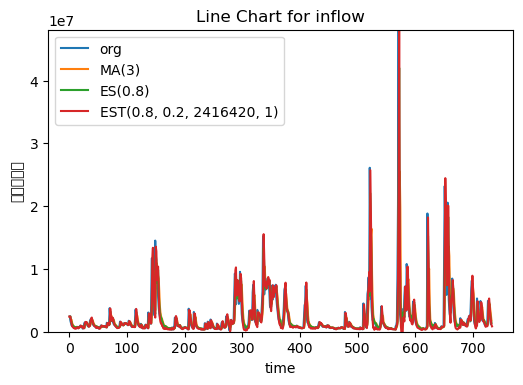

In [15]:
plt.plot(ma03_result_df['time'], ma03_result_df['orig'])
plt.plot(ma03_result_df['time'], ma03_result_df['ma_forecast'])
plt.plot(es02_result_df['time'], es02_result_df['es_forecast'])
plt.plot(esm_ab_result_df['time'], esm_ab_result_df['esm_forecast'])
plt.ylim(0, max(df3['水庫進流量/立方公尺'])+100)
plt.legend(labels=['org', 'MA(3)', 'ES(0.8)', 'EST(0.8, 0.2, 2416420, 1)'])
plt.xlabel('time')
plt.ylabel('水庫進流量')
plt.title('Line Chart for inflow')
plt.show()